In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

from aplpy import FITSFigure as aplfig
import astropy.units as u

import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

from matplotlib.colors import ListedColormap


### Read in files

In [2]:
nh3_cb_11 = fits.getdata('../datacubes/H-MM1_NH3_11_bls.fits')
nh3_cb_22 = fits.getdata('../datacubes/H-MM1_NH3_22_bls.fits')

In [3]:
npeaks, hd = fits.getdata('fitcubes/npeaks_cut5.fits', header=True)

parcb_1cmp = fits.getdata('fitcubes/H-MM1-mle-x1.fits')
parcb_2cmp = fits.getdata('fitcubes/H-MM1-mle-x2.fits')
parcb_3cmp = fits.getdata('fitcubes/H-MM1-mle-x3.fits')

In [4]:
npeaks_2cmp = npeaks.copy()
npeaks_2cmp[npeaks_2cmp == 3] = 2

In [5]:
figs_dir = 'figures/'
para_map_dir = 'para_maps/'

### Calculate moment0 maps

In [141]:
cb_header = fits.getheader('../datacubes/H-MM1_NH3_11_bls.fits')

In [142]:
ref_freq = cb_header['CRVAL3']
del_freq = cb_header['CDELT3']

In [143]:
chan_width_km = ((del_freq/ref_freq) * 299792458) / 1000.

In [9]:
# cb_header

In [10]:
mom0_11 = np.nansum(nh3_cb_11, axis=0) * chan_width_km
mom0_22 = np.nansum(nh3_cb_22, axis=0) * chan_width_km

In [11]:
nh3_cb_11.shape, nh3_cb_22.shape

((801, 132, 173), (501, 132, 173))

In [ ]:
rms11 = fits.getdata('../datacubes/H-MM1_rms_11.fits')
rms22 = fits.getdata('../datacubes/H-MM1_rms_22.fits')

In [50]:
rms_11_mom0 = rms11 * chan_width_km * np.sqrt(801)
rms_22_mom0 = rms22 * chan_width_km * np.sqrt(501)

In [51]:
np.nanmedian(rms_11_mom0), np.nanmedian(rms_22_mom0)

(0.07748025, 0.059990562)

#### write into files

In [16]:
# hd_mom0 = hd.copy()
# hd_mom0['bunit'] = 'K km/s'

# fits.writeto(para_map_dir + 'mom0_11.fits', mom0_11, hd_mom0)
# fits.writeto(para_map_dir + 'mom0_22.fits', mom0_22, hd_mom0)

#### read moment 0 maps from files

In [52]:
mom0_11 = fits.getdata(para_map_dir + 'mom0_11.fits')
mom0_22 = fits.getdata(para_map_dir + 'mom0_22.fits')

In [53]:
snr_11_mom0 = mom0_11/rms_11_mom0
snr_22_mom0 = mom0_22/rms_22_mom0

In [35]:
def setup_plot( fig, cmap='inferno', vmin=0, vmax=10., col_text='Sample (Jy/beam)', colbr_loc='top', 
               beam_color='green', clrscl_stretch='linear', sclbr=0.2, sclbr_loc='bottom right', sclbr_clr='k', 
               x_txt=0.1, y_txt=0.1, lbl_text='', label_col='k', lbl_size=15):
    """
    sets up a aplpy FITSfigure instance in a presentable way
    
    inputs
    
    fig            : an aplpy FITSfigure instance 
    cmap           : colourmap for the figure, default is 'inferno'
    vmin, vmax     : lower and upper limits of the colourmap
    col_text       : text for the colourbar, default is  'Sample (Jy/beam)'
    colbr_loc      : location of the colour bar. Default is 'top'
    beam_colour    : colour of the beam, default is green
    clrscl_stretch : style of colourscale. default is 'linear'
    sclbr          : length of the scalebar (in pc), default is 0.2
    sclbr_loc      : location of the scale bar. Default is 'bottom right'
    x_txt, y_txt   : location of the text on the figure, default is (0.1, 0.1)
    lbl_text       : label to be put on the figure, default is 'L1688'
    label_col      : colour of the label text, default is black
    lbl_size       : size of the label text, default is 15
    
    """

    fig.show_colorscale( cmap=cmap, vmin=vmin, vmax=vmax,stretch=clrscl_stretch)
    
    fig.add_colorbar()
    fig.colorbar.show(location=colbr_loc,axis_label_text=col_text)
    
    fig.add_beam(color=beam_color)
    
    distance = 138.4 *u.pc
    scale=(sclbr*u.pc/distance*u.rad).to(u.deg)
    fig.add_scalebar(scale, label=str(sclbr)+' pc', color=sclbr_clr, location=sclbr_loc)
    
    fig.ticks.set_color('black')
    
    fig.add_label(x_txt, y_txt, lbl_text, relative=True,color=label_col,size=lbl_size)
    
    return fig

INFO: Auto-setting resolution to 24.3318 dpi [aplpy.core]


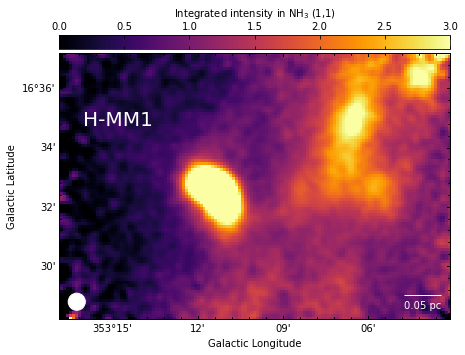

In [28]:
fig = aplfig(fits.PrimaryHDU(data=mom0_11, header=hd),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=3, col_text = r'Integrated intensity in NH$_3$ (1,1)', 
                 beam_color='w', sclbr=0.05, x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='w', 
                 sclbr_clr='w', lbl_size=20)

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.savefig(figs_dir + 'mom0_11.pdf')

INFO: Auto-setting resolution to 24.3318 dpi [aplpy.core]


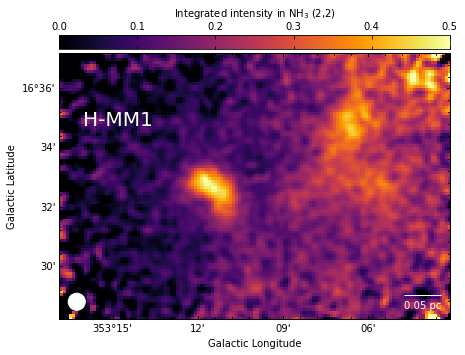

In [30]:
fig = aplfig(fits.PrimaryHDU(data=mom0_22, header=hd),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=0.5, col_text = r'Integrated intensity in NH$_3$ (2,2)', 
                 beam_color='w', sclbr=0.05, x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='w', 
                 sclbr_clr='w', lbl_size=20)

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.savefig(figs_dir + 'mom0_22.pdf')

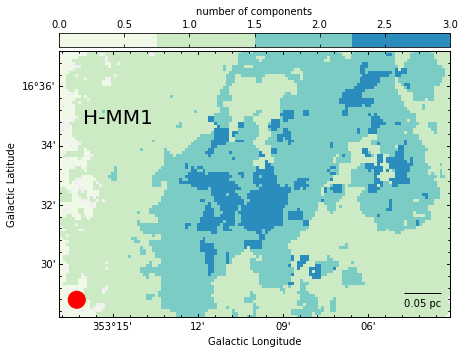

In [15]:
fig = aplfig(fits.PrimaryHDU(data=npeaks, header=hd),figsize=(7,7))


cmaplst = ['#f0f9e8', '#ccebc5', '#7bccc4', '#2b8cbe']         # colours representing number of components fit
lcmap = ListedColormap(cmaplst)                                # set colourmap with these colours
lcmap.set_bad('#f0f0f0') 

text_color='white'
contour_color='k'

fig = setup_plot( fig, cmap=lcmap, vmin=0, vmax=3, col_text = r'number of components', beam_color='r', sclbr=0.05, 
                 x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='k', lbl_size=20)

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

# fig.savefig(figs_dir + 'npeaks.pdf')

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


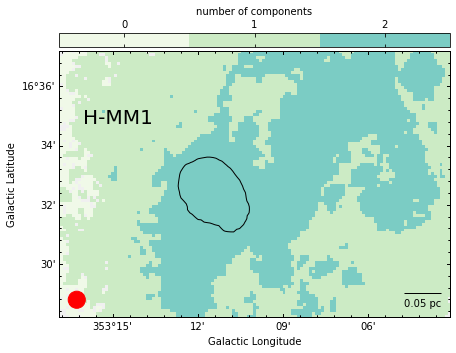

In [221]:
fig = aplfig(fits.PrimaryHDU(data=npeaks_2cmp, header=hd),figsize=(7,7))

cmaplst = ['#f0f9e8', '#ccebc5', '#7bccc4']         # colours representing number of components fit
lcmap = ListedColormap(cmaplst)                                # set colourmap with these colours
lcmap.set_bad('#f0f0f0') 

text_color='white'
contour_color='k'

fig = setup_plot( fig, cmap=lcmap, vmin=-0.5, vmax=2.5, col_text = r'number of components', beam_color='r', sclbr=0.05, 
                 x_txt=0.15, y_txt=0.75,lbl_text='H-MM1', label_col='k', lbl_size=20, colbr_loc='top')

fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.colorbar.set_ticks([0, 1, 2])

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

# for i in range(len(labels)):
#     # labels
#     fig.add_label( ra_list_text[i], dec_list_text[i], labels[i], color='k', size=14, weight=500, 
#                   bbox=dict(boxstyle="circle", fc="0.8", alpha=1))
#     # arrows pointing to the pixels
#     fig.show_arrows(ra_list_text, dec_list_text, dra_list, ddec_list, head_width=2, width=0.1, color='k')

fig.savefig(figs_dir + 'npeaks_2cmp.pdf', dpi=100)

## Plot figures reprojected in RA-Dec

#### find image centre in RA-Dec

In [6]:
# from astropy.coordinates import SkyCoord

In [14]:
# cent_gal = SkyCoord(l=hd['crval1']*u.degree, b=hd['crval2']*u.degree, frame='galactic')
# cent_radec = cent_gal.transform_to('fk5')

#### create footprint header in RA-Dec for reprojection

In [15]:
# hd_ra_dec = hd.copy()

# hd_ra_dec['naxis1'] = 150
# hd_ra_dec['naxis2'] = 150

# hd_ra_dec['crpix1'] = 75
# hd_ra_dec['crpix2'] = 75

# hd_ra_dec['ctype1'] = 'RA---TAN'
# hd_ra_dec['ctype2'] = 'DEC--TAN'

# hd_ra_dec['OBSRA'] = cent_radec.ra.value
# hd_ra_dec['OBSDEC'] = cent_radec.dec.value

# hd_ra_dec['crval1'] = cent_radec.ra.value
# hd_ra_dec['crval2'] = cent_radec.dec.value


## reproject parameter maps to RA-Dec

In [7]:
# from reproject import reproject_interp

### cycle through parameter maps

In [60]:
# npeaks_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=npeaks_2cmp, header=hd), hd_ra_dec)

# mom0_11_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=mom0_11, header=hd), hd_ra_dec)
# mom0_22_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=mom0_22, header=hd), hd_ra_dec)

# rms_11_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=rms11, header=hd), hd_ra_dec)
# rms_22_repr, ftpr = reproject_interp(fits.PrimaryHDU(data=rms22, header=hd), hd_ra_dec)

# sig_narrow_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_narrow.fits')[0], hd_ra_dec)
# vel_narrow_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_narrow.fits')[0], hd_ra_dec)
# tk_narrow_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'tk_narrow.fits')[0], hd_ra_dec)

# sig_narrow_blue_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_narrow_blue.fits')[0], hd_ra_dec)
# vel_narrow_blue_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_narrow_blue.fits')[0], hd_ra_dec)
# sig_narrow_red_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_narrow_red.fits')[0], hd_ra_dec)
# vel_narrow_red_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_narrow_red.fits')[0], hd_ra_dec)

# sig_broad_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_broad.fits')[0], hd_ra_dec)
# vel_broad_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_broad.fits')[0], hd_ra_dec)
# tk_broad_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'tk_broad.fits')[0], hd_ra_dec)

# mach_number_1cmp_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'mach_number_1cmp.fits')[0], hd_ra_dec)

In [306]:
# mom0_11_repr[mom0_11_repr == 0] = np.nan
# mom0_22_repr[mom0_22_repr == 0] = np.nan

In [61]:
# rms_11_repr[rms_11_repr == 0] = np.nan
# rms_22_repr[rms_22_repr == 0] = np.nan

In [ ]:
# tk_narrow_blue_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'tk_narrow_blue.fits')[0], hd_ra_dec)
# tk_narrow_red_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'tk_narrow_red.fits')[0], hd_ra_dec)

#### write out the reprojected parameter maps

In [18]:
# para_map_repr_dir = 'para_maps_repr/'

In [62]:
# fits.writeto(para_map_repr_dir + 'npeaks_repr.fits', npeaks_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'mom0_11_repr.fits', mom0_11_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'mom0_22_repr.fits', mom0_22_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'rms_11_repr.fits', rms_11_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'rms_22_repr.fits', rms_22_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'sig_narrow_repr.fits', sig_narrow_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_narrow_repr.fits', vel_narrow_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'tk_narrow_repr.fits', tk_narrow_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'sig_narrow_blue_repr.fits', sig_narrow_blue_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_narrow_blue_repr.fits', vel_narrow_blue_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'sig_narrow_red_repr.fits', sig_narrow_red_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_narrow_red_repr.fits', vel_narrow_red_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'sig_broad_repr.fits', sig_broad_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_broad_repr.fits', vel_broad_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'tk_broad_repr.fits', tk_broad_repr, hd_ra_dec, overwrite=True)

# fits.writeto(para_map_repr_dir + 'mach_number_1cmp_repr.fits', mach_number_1cmp_repr, hd_ra_dec, overwrite=True)


In [20]:
# fits.writeto(para_map_repr_dir + 'tk_narrow_blue_repr.fits', tk_narrow_blue_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'tk_narrow_red_repr.fits', tk_narrow_red_repr, hd_ra_dec, overwrite=True)

#### read in reprojected maps

In [6]:
para_map_repr_dir = 'para_maps_repr/'

In [7]:
npeaks_repr, hd_repr = fits.getdata(para_map_repr_dir + 'npeaks_repr.fits', header=True)

mom0_11_repr = fits.getdata(para_map_repr_dir + 'mom0_11_repr.fits')
mom0_22_repr = fits.getdata(para_map_repr_dir + 'mom0_22_repr.fits')

rms_11_repr = fits.getdata(para_map_repr_dir + 'rms_11_repr.fits')
rms_22_repr = fits.getdata(para_map_repr_dir + 'rms_22_repr.fits')

mach_number_1cmp_repr = fits.getdata(para_map_repr_dir + 'mach_number_1cmp_repr.fits')

sig_narrow_repr = fits.getdata(para_map_repr_dir + 'sig_narrow_repr.fits')
vel_narrow_repr = fits.getdata(para_map_repr_dir + 'vel_narrow_repr.fits')
tk_narrow_repr = fits.getdata(para_map_repr_dir + 'tk_narrow_repr.fits')

sig_narrow_blue_repr = fits.getdata(para_map_repr_dir + 'sig_narrow_blue_repr.fits')
vel_narrow_blue_repr = fits.getdata(para_map_repr_dir + 'vel_narrow_blue_repr.fits')
sig_narrow_red_repr = fits.getdata(para_map_repr_dir + 'sig_narrow_red_repr.fits')
vel_narrow_red_repr = fits.getdata(para_map_repr_dir + 'vel_narrow_red_repr.fits')

sig_broad_repr = fits.getdata(para_map_repr_dir + 'sig_broad_repr.fits')
vel_broad_repr = fits.getdata(para_map_repr_dir + 'vel_broad_repr.fits')
tk_broad_repr = fits.getdata(para_map_repr_dir + 'tk_broad_repr.fits')

In [8]:
tk_narrow_red_repr = fits.getdata(para_map_repr_dir + 'tk_narrow_red_repr.fits')
tk_narrow_blue_repr = fits.getdata(para_map_repr_dir + 'tk_narrow_blue_repr.fits')

In [144]:
rms_11_mom0_repr = rms_11_repr * chan_width_km * np.sqrt(801)
rms_22_mom0_repr = rms_22_repr * chan_width_km * np.sqrt(501)

In [145]:
snr_11_mom0_repr = mom0_11_repr/rms_11_mom0_repr
snr_22_mom0_repr = mom0_22_repr/rms_22_mom0_repr

### make figures for reprojected parameter map 

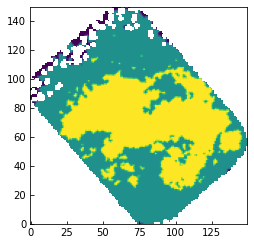

In [290]:
plt.imshow(npeaks_repr, origin='lower')

#### npeaks

##### show example spectra in selected pixels

In [130]:
from astropy.wcs import WCS
from matplotlib.patches import Circle

In [131]:
wcs = WCS(hd_repr)
wcs_gal = WCS(hd)


### coordinates of example pixels in RA-Dec

In [133]:
# pixel number in galactic projection
x_list_gal = np.array([125, 68, 115])
y_list_gal = np.array([40, 55, 100])

# convert to galactic coords
lat_list, long_list = wcs_gal.all_pix2world(x_list_gal, y_list_gal, 0)

# # convert to RA-Dec

ra_list = []
dec_list = []
for i in range(x_list_gal.shape[0]) :
    
    coord_gal = SkyCoord(l=lat_list[i]*u.degree, b=long_list[i]*u.degree, frame='galactic')
    coord_radec = coord_gal.transform_to('fk5')
    
    ra_list.append(coord_radec.ra.value)
    dec_list.append(coord_radec.dec.value)
    
ra_list = np.array(ra_list)
dec_list = np.array(dec_list)

# pixel number in ra-dec projection
x_list_radec, y_list_radec = wcs.all_world2pix(ra_list, dec_list, 1)


In [134]:
# # x,y co-ordinates of the positions chosen for the example spectra
# xlist = np.array([54, 119, 84])
# ylist = np.array([82, 76, 13])

# lengths of the arrows in x- and y-axes
dxlist = np.array([-40, -30, 15])
dylist = np.array([0, 10, 20])

# number labels of the positions (with 1-, 2-, and 3-components detected, respectively)
labels = np.array([1, 2, 3])

# calculate positions of markers and lengths of arrows in world co-ordinates
# ra_list, dec_list = wcs.all_pix2world(x_list_radec, y_list_radec, 0)                            # pixel pos
ra_list_text, dec_list_text = wcs.all_pix2world(x_list_radec + dxlist, y_list_radec + dylist, 0)  # marker pos
dra_list = ra_list - ra_list_text                                                                 # RA-arrow length 
ddec_list = dec_list - dec_list_text                                                              # dec-arrow length 


/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


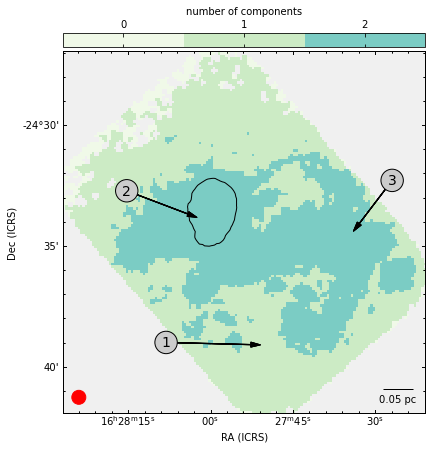

In [136]:
fig = aplfig(fits.PrimaryHDU(data=npeaks_repr, header=hd_repr),figsize=(7,7))

cmaplst = ['#f0f9e8', '#ccebc5', '#7bccc4']         # colours representing number of components fit
lcmap = ListedColormap(cmaplst)                                # set colourmap with these colours
lcmap.set_bad('#f0f0f0') 

text_color='white'
contour_color='k'

fig = setup_plot( fig, cmap=lcmap, vmin=-0.5, vmax=2.5, col_text = r'number of components', beam_color='r', 
                 sclbr=0.05, x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20, colbr_loc='top')

# fig.recenter(353.1667,16.545,width=0.22,height=0.15)
fig.beam.set_corner('bottom left')

# fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

fig.colorbar.set_ticks([0, 1, 2])

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)

for i in range(len(labels)):
    # labels
    fig.add_label( ra_list_text[i], dec_list_text[i], labels[i], color='k', size=14, weight=500, 
                  bbox=dict(boxstyle="circle", fc="0.8", alpha=1))
    # arrows pointing to the pixels
    fig.show_arrows(ra_list_text, dec_list_text, dra_list, ddec_list, head_width=2, width=0.1, color='k')

fig.savefig(figs_dir + 'npeaks_2cmp_repr_with_example_pix_wo_source_name.pdf', dpi=200)

#### moment 0 maps

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


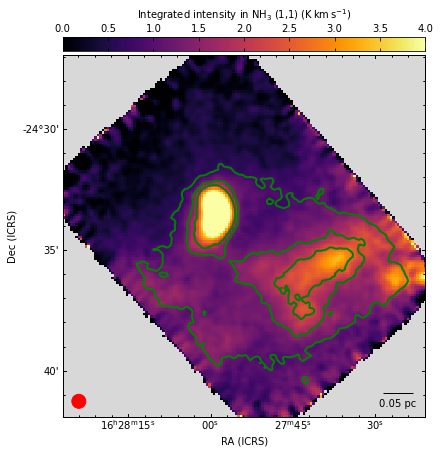

In [146]:
mom0_11_repr[mom0_11_repr == 0] = np.nan

fig = aplfig(fits.PrimaryHDU(data=mom0_11_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=4, col_text = r'Integrated intensity in NH$_3$ (1,1) ($\rm K\,km\,s^{-1}$)', 
                 beam_color='r', sclbr=0.05, x_txt=0.85, y_txt=0.85, label_col='k', sclbr_clr='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(snr_11_mom0_repr, levels=np.array([15, 30, 45]), colors='g',linewidths=2)

fig.savefig(figs_dir + 'mom0_11_repr_snr_contours_wo_source_name.pdf', dpi=200)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


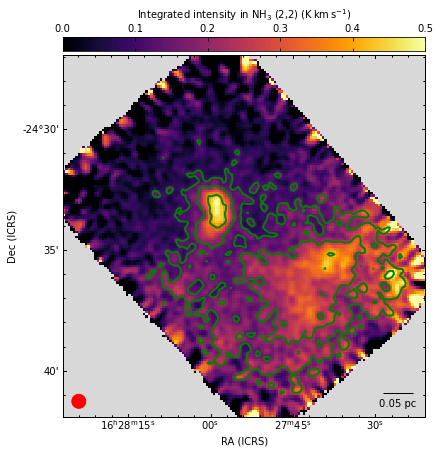

In [147]:
mom0_22_repr[mom0_22_repr == 0] = np.nan

fig = aplfig(fits.PrimaryHDU(data=mom0_22_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=0.5, col_text = r'Integrated intensity in NH$_3$ (2,2) ($\rm K\,km\,s^{-1}$)', 
                 beam_color='r', sclbr=0.05, x_txt=0.85, y_txt=0.85, label_col='k', sclbr_clr='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(snr_22_mom0_repr, levels=np.array([3, 5, 10]), colors='g',linewidths=2)

fig.savefig(figs_dir + 'mom0_22_repr_snr_contours_wo_source_name.pdf', dpi=200)

#### mach number

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


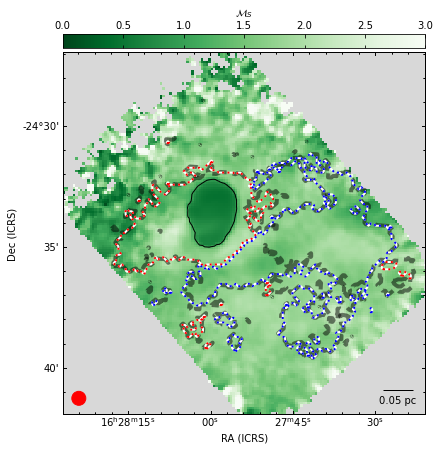

In [59]:
fig = aplfig(fits.PrimaryHDU(data=mach_number_1cmp_repr, header=hd_repr), figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('Greens_r')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=3, col_text = r'$\mathcal{M}_S$', beam_color='r', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_1cmp.fits', levels=[2], colors='k',linewidths=1, linestyles='dotted')
fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', levels=[1], colors='k',linewidths=4, 
                 linestyles='dashed', alpha=0.5)

fig.show_contour((vel_narrow_red_repr>2)*1, levels=[0.5], colors='w', linewidths=2, linestyles='dashed')
fig.show_contour((vel_narrow_blue_repr>2)*1, levels=[0.5], colors='w', linewidths=2, linestyles='dashed')
fig.show_contour((vel_narrow_red_repr>2)*1, levels=[0.5], colors='red', linewidths=2, linestyles='dotted')
fig.show_contour((vel_narrow_blue_repr>2)*1, levels=[0.5], colors='blue', linewidths=2, linestyles='dotted')


fig.savefig(figs_dir + 'mach_1cmp_repr_wo_source_name_red_blue_shown.pdf', dpi=200)

#### velocity dispersion

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


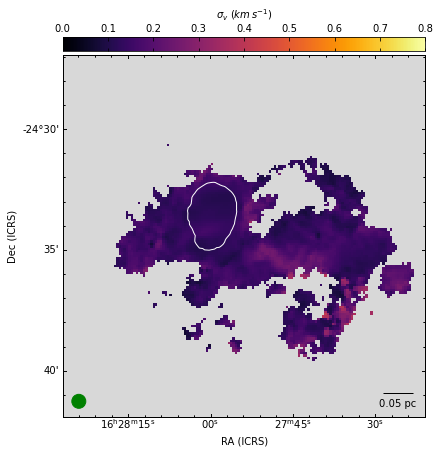

In [150]:
fig = aplfig(fits.PrimaryHDU(data=sig_narrow_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=0.8, col_text = r'$\sigma_v\ (km\,s^{-1})$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='w',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', levels=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'sig_narrow_repr_wo_source_name.pdf', dpi=200)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


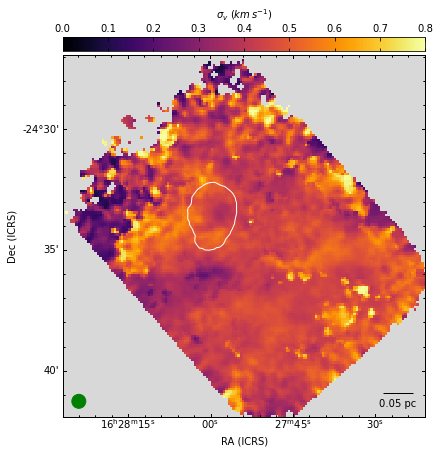

In [151]:
fig = aplfig(fits.PrimaryHDU(data=sig_broad_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0, vmax=0.8, col_text = r'$\sigma_v\ (km\,s^{-1})$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='w',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', levels=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'sig_broad_repr_wo_source_name.pdf', dpi=200)

#### LSR velocity

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


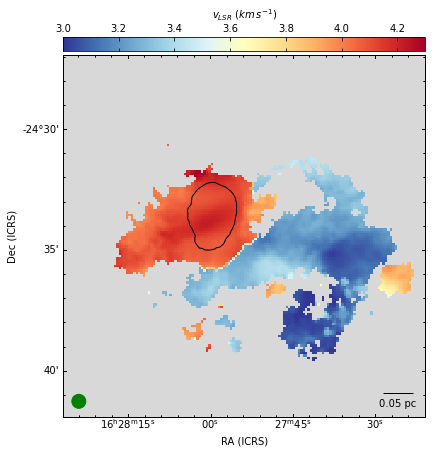

In [152]:
fig = aplfig(fits.PrimaryHDU(data=vel_narrow_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=3, vmax=4.3, col_text = r'$v_{LSR}\ (km\,s^{-1})$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', levels=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'vel_narrow_repr_wo_source_name.pdf', dpi=200)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


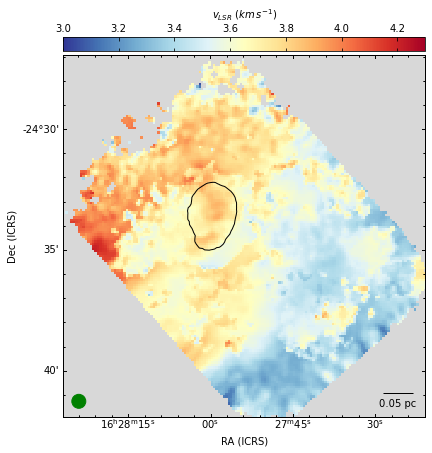

In [153]:
fig = aplfig(fits.PrimaryHDU(data=vel_broad_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=3, vmax=4.3, col_text = r'$v_{LSR}\ (km\,s^{-1})$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', levels=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'vel_broad_repr_wo_source_name.pdf', dpi=200)

#### Kinetic temperature

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


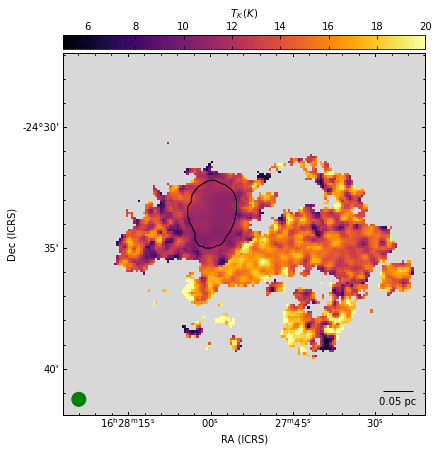

In [154]:
fig = aplfig(fits.PrimaryHDU(data=tk_narrow_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=5, vmax=20, col_text = r'$T_K\, (K)$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', letks=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'tk_narrow_repr_wo_source_name.pdf', dpi=200)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


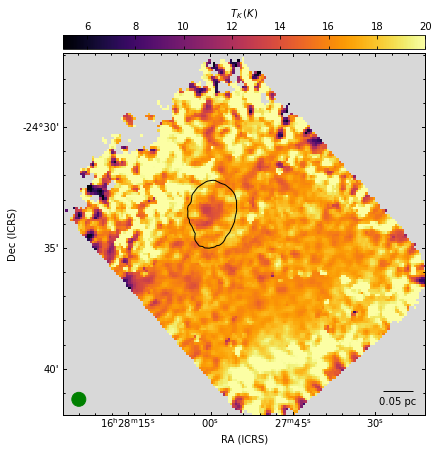

In [155]:
fig = aplfig(fits.PrimaryHDU(data=tk_broad_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=5, vmax=20, col_text = r'$T_K\, (K)$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', letks=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'tk_broad_repr_wo_source_name.pdf', dpi=200)

#### Figures for discussions

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


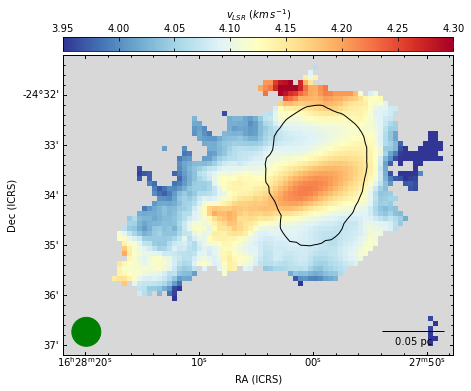

In [93]:
fig = aplfig(fits.PrimaryHDU(data=vel_narrow_red_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=3.95, vmax=4.3, col_text = r'$v_{LSR}\ (km\,s^{-1})$', beam_color='g', 
                 sclbr=0.05, lbl_text='')

fig.beam.set_corner('bottom left')

fig.recenter(247.02,-24.57,width=0.13,height=0.1)

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', levels=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'vel_narrow_red_repr_zoomed_colourscale.pdf', dpi=200)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


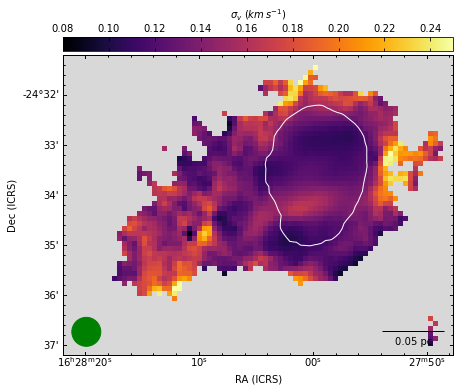

In [94]:
fig = aplfig(fits.PrimaryHDU(data=sig_narrow_red_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0.08, vmax=0.25, col_text = r'$\sigma_{v}\ (km\,s^{-1})$', beam_color='g', 
                 sclbr=0.05, lbl_text='')

fig.beam.set_corner('bottom left')

fig.recenter(247.02,-24.57,width=0.13,height=0.1)

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='w',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', lesigs=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'sig_narrow_repr_red_zoomed_colourscale.pdf', dpi=200)

#### streamer structure

##### reproject the parameter maps

In [363]:
# sig_streamer_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'sig_streamer.fits')[0], hd_ra_dec)
# vel_streamer_repr, ftpr = reproject_interp(fits.open(para_map_dir + 'vel_streamer.fits')[0], hd_ra_dec)

##### write out the reprojected maps

In [321]:
# para_map_repr_dir = 'para_maps_repr/'

In [364]:
# fits.writeto(para_map_repr_dir + 'sig_streamer_repr.fits', sig_streamer_repr, hd_ra_dec, overwrite=True)
# fits.writeto(para_map_repr_dir + 'vel_streamer_repr.fits', vel_streamer_repr, hd_ra_dec, overwrite=True)

##### read in files

In [321]:
# para_map_repr_dir = 'para_maps_repr/'

In [96]:
sig_streamer = fits.getdata(para_map_repr_dir + 'sig_streamer_repr.fits')
vel_streamer = fits.getdata(para_map_repr_dir + 'vel_streamer_repr.fits')

##### plot

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


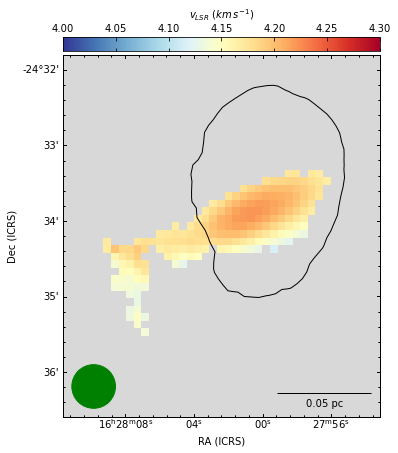

In [97]:
fig = aplfig(fits.PrimaryHDU(data=vel_streamer, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=4, vmax=4.3, col_text = r'$v_{LSR}\ (km\,s^{-1})$', beam_color='g', 
                 sclbr=0.05, lbl_text='')

fig.recenter(247.01,-24.57,width=0.07,height=0.08)
fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', levels=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'vel_streamer_repr.pdf', dpi=200)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


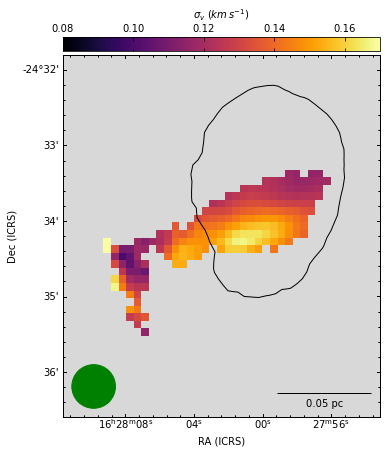

In [98]:
fig = aplfig(fits.PrimaryHDU(data=sig_streamer, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=0.08, vmax=0.17, col_text = r'$\sigma_{v}\ (km\,s^{-1})$', beam_color='g', 
                 sclbr=0.05, lbl_text='')

fig.recenter(247.01,-24.57,width=0.07,height=0.08)
fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', lesigs=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'sig_streamer_repr.pdf', dpi=200)

#### Blue component with N(H$_2$) contours 

In [99]:
h2_col_hgbs_file = '../HGBS_oph_l1688_hires_column_density_map.fits'

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


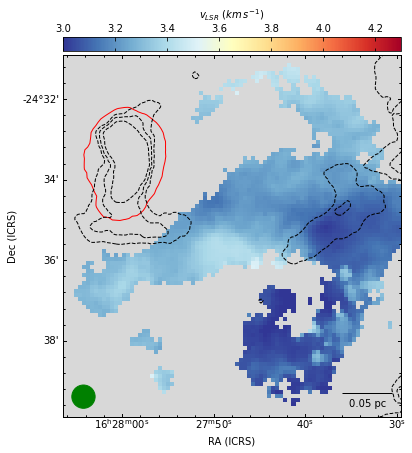

In [100]:
fig = aplfig(fits.PrimaryHDU(data=vel_narrow_blue_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=3, vmax=4.3, col_text = r'$v_{LSR}\ (km\,s^{-1})$', beam_color='g', 
                 sclbr=0.05, lbl_text='')

fig.recenter(246.95,-24.59,width=0.14,height=0.15)
fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='r',linewidths=1)

fig.show_contour(h2_col_hgbs_file, levels=np.array([1.3, 1.5, 1.8])*1e22, colors='k',linewidths=1,
                 linestyles='dashed')
# fig.show_contour(h2_col_hgbs_file, levels=np.array([1.45])*1e22, colors='k',linewidths=1,
#                  linestyles='dashed')

fig.savefig(figs_dir + 'vel_narrow_blue_repr_NH2_coh_core_contours.pdf', dpi=200)

#### separate $T_K$ maps for red-narrow and blue-narrow

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


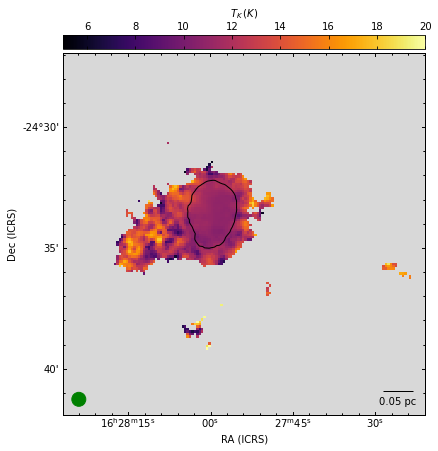

In [156]:
fig = aplfig(fits.PrimaryHDU(data=tk_narrow_red_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=5, vmax=20, col_text = r'$T_K\, (K)$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', letks=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'tk_narrow_red_repr_wo_source_name.pdf', dpi=200)

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


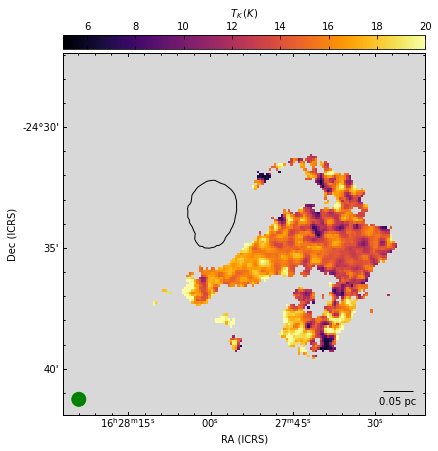

In [157]:
fig = aplfig(fits.PrimaryHDU(data=tk_narrow_blue_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('inferno')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=5, vmax=20, col_text = r'$T_K\, (K)$', beam_color='g', sclbr=0.05, 
                 x_txt=0.85, y_txt=0.85, label_col='k', lbl_size=20)

fig.beam.set_corner('bottom left')

fig.show_contour(para_map_dir + 'mach_number_1cmp_w_mask.fits', levels=[1], colors='k',linewidths=1)
# fig.show_contour(para_map_dir + 'mach_number_nr_for_msk.fits', letks=[1], colors='k',linewidths=1, 
#                  linestyles='dashed')

fig.savefig(figs_dir + 'tk_narrow_blue_repr_wo_source_name.pdf', dpi=200)

#### Check velocity gradient in narrow-blue

/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:256: UserWarning: Text labels do not have attribute location. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute location. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


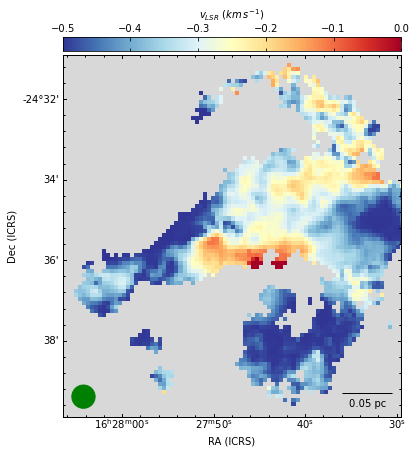

In [436]:
fig = aplfig(fits.PrimaryHDU(data=vel_narrow_blue_repr - vel_broad_repr, header=hd_repr),figsize=(7,7))

text_color='white'
contour_color='k'

cmap = plt.cm.get_cmap('RdYlBu_r')
cmap.set_bad('0.85')

fig = setup_plot( fig, cmap=cmap, vmin=-0.5, vmax=0, col_text = r'$v_{LSR}\ (km\,s^{-1})$', beam_color='g', 
                 sclbr=0.05, lbl_text='')

fig.recenter(246.95,-24.59,width=0.14,height=0.15)
fig.beam.set_corner('bottom left')

#### check peak snr

In [37]:
tpeak_11 = np.nanmax(nh3_cb_11, axis=0)
tpeak_22 = np.nanmax(nh3_cb_22, axis=0)

/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_26938/138405234.py:1: RuntimeWarning: All-NaN slice encountered
  tpeak_11 = np.nanmax(nh3_cb_11, axis=0)
/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_26938/138405234.py:2: RuntimeWarning: All-NaN slice encountered
  tpeak_22 = np.nanmax(nh3_cb_22, axis=0)


In [39]:
rms11 = fits.getdata('../datacubes/H-MM1_rms_11.fits')
rms22 = fits.getdata('../datacubes/H-MM1_rms_22.fits')

In [40]:
snr_peak_11 = tpeak_11/rms11
snr_peak_22 = tpeak_22/rms22

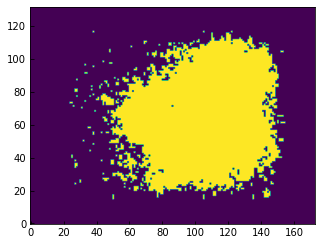

In [49]:
plt.imshow(snr_peak_22>4, origin='lower')

## histograms for kinetic temperatures of each component

([<matplotlib.axis.YTick at 0x7f7c4dc7b070>,
 [Text(0, 50, '50'),
  Text(0, 100, '100'),
  Text(0, 150, '150'),
  Text(0, 200, '200')])

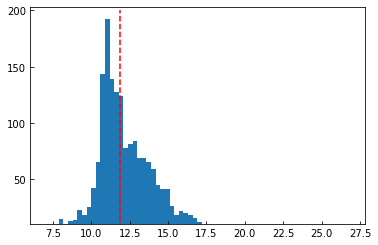

In [87]:
plt.hist(tk_narrow_red_repr.flatten(), bins=np.arange(7, 27, 0.3))
plt.vlines(np.nanmedian(tk_narrow_red_repr), ymin=0, ymax=200, colors='r', linestyles='dashed')

plt.ylim(10, 203)

plt.yticks([50, 100, 150, 200])

([<matplotlib.axis.YTick at 0x7f7c5ea6fd30>,
 [Text(0, 50, '50'), Text(0, 100, '100'), Text(0, 150, '150')])

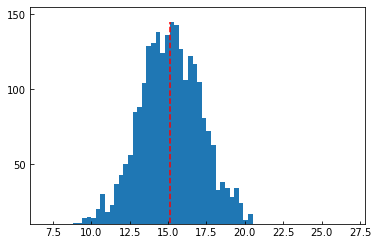

In [88]:
plt.hist(tk_narrow_blue_repr.flatten(), bins=np.arange(7, 27, 0.3))
plt.vlines(np.nanmedian(tk_narrow_blue_repr), ymin=0, ymax=145, colors='r', linestyles='dashed')

plt.ylim(10, 155)
plt.yticks([50, 100, 150])

([<matplotlib.axis.YTick at 0x7f7c4dd839d0>,
 [Text(0, 200, '200'),
  Text(0, 400, '400'),
  Text(0, 600, '600'),
  Text(0, 800, '800')])

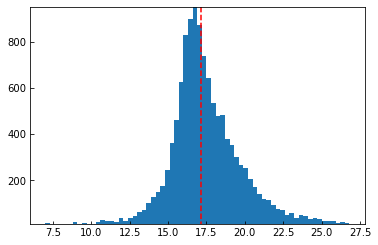

In [89]:
plt.hist(tk_broad_repr.flatten(), bins=np.arange(7, 27, 0.3))
plt.vlines(np.nanmedian(tk_broad_repr), ymin=0, ymax=950, colors='r', linestyles='dashed')

plt.ylim(10, 950)
plt.yticks([200, 400, 600, 800])

### KDE

In [9]:
from scipy.stats import gaussian_kde

### $\rm T_K$

In [11]:
x_grid = np.linspace(7, 27, 100)

In [24]:
kde_tk_narrow_red = gaussian_kde(tk_narrow_red_repr[np.isfinite(tk_narrow_red_repr)])
kde_tk_narrow_blue = gaussian_kde(tk_narrow_blue_repr[np.isfinite(tk_narrow_blue_repr)])
kde_tk_broad = gaussian_kde(tk_broad_repr[np.isfinite(tk_broad_repr)])


pdf_tk_narrow_red = kde_tk_narrow_red.evaluate(x_grid)
pdf_tk_narrow_blue = kde_tk_narrow_blue.evaluate(x_grid)
pdf_tk_broad = kde_tk_broad.evaluate(x_grid)

# eh = kde_w_weight(x_grid)

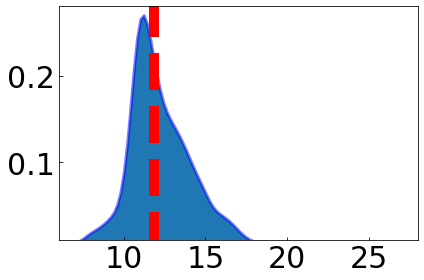

In [31]:
fig, ax = plt.subplots()

ax.tick_params(axis='both', which='major', labelsize=30)


ax.plot(x_grid, pdf_tk_narrow_red, color='blue', alpha=0.5, lw=3)
ax.fill_between(x_grid, pdf_tk_narrow_red)

ax.vlines(np.nanmedian(tk_narrow_red_repr), ymin=0, ymax=0.28, colors='r', linestyles='dashed', linewidth=10)

ax.set_ylim(0.01, 0.28)

ax.set_yticks([0.1, 0.2])
ax.set_xticks([10, 15, 20, 25])

plt.tight_layout()

fig.savefig(figs_dir + 'kde_distri_tk_narrow_red.pdf')

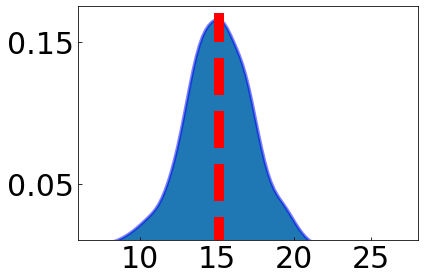

In [32]:
fig, ax = plt.subplots()

ax.plot(x_grid, pdf_tk_narrow_blue, color='blue', alpha=0.5, lw=3)
ax.fill_between(x_grid, pdf_tk_narrow_blue)

ax.vlines(np.nanmedian(tk_narrow_blue_repr), ymin=0, ymax=0.17, colors='r', linestyles='dashed', linewidth=10)

ax.set_ylim(0.01, 0.175)

ax.set_yticks([0.05, 0.15])
ax.set_xticks([10, 15, 20, 25])

ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()

fig.savefig(figs_dir + 'kde_distri_tk_narrow_blue.pdf')

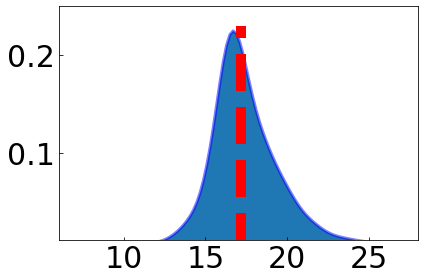

In [33]:
fig, ax = plt.subplots()

ax.plot(x_grid, pdf_tk_broad, color='blue', alpha=0.5, lw=3)
ax.fill_between(x_grid, pdf_tk_broad)

ax.vlines(np.nanmedian(tk_broad_repr), ymin=0, ymax=0.23, colors='r', linestyles='dashed', linewidth=10)

ax.set_ylim(0.01, 0.25)

ax.set_yticks([0.1, 0.2])
ax.set_xticks([10, 15, 20, 25])

ax.tick_params(axis='both', which='major', labelsize=30)

plt.tight_layout()

fig.savefig(figs_dir + 'kde_distri_tk_broad.pdf')

### $\rm v_{LSR}$

In [95]:
x_grid = np.linspace(2.8, 4.4, 100)

In [96]:
kde_vel_narrow = gaussian_kde(vel_narrow_repr[np.isfinite(vel_narrow_repr)])
kde_vel_broad = gaussian_kde(vel_broad_repr[np.isfinite(vel_broad_repr)])


pdf_vel_narrow = kde_vel_narrow.evaluate(x_grid)
pdf_vel_broad = kde_vel_broad.evaluate(x_grid)

# eh = kde_w_weight(x_grid)

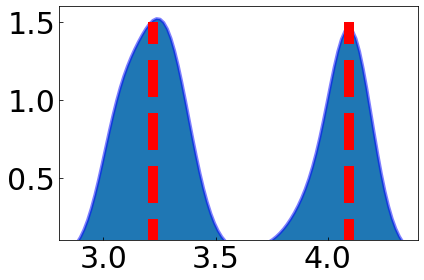

In [97]:
fig, ax = plt.subplots()

ax.tick_params(axis='both', which='major', labelsize=30)


ax.plot(x_grid, pdf_vel_narrow, color='blue', alpha=0.5, lw=3)
ax.fill_between(x_grid, pdf_vel_narrow)

ax.vlines(np.nanmedian(vel_narrow_blue_repr), ymin=0, ymax=1.5, colors='r', linestyles='dashed', linewidth=10)
ax.vlines(np.nanmedian(vel_narrow_red_repr), ymin=0, ymax=1.5, colors='r', linestyles='dashed', linewidth=10)

ax.set_ylim(0.1, 1.6)

ax.set_yticks([0.5, 1, 1.5])
ax.set_xticks([3, 3.5, 4])

plt.xlim(2.8, 4.4)

plt.tight_layout()

fig.savefig(figs_dir + 'kde_distri_vel_narrow.pdf')

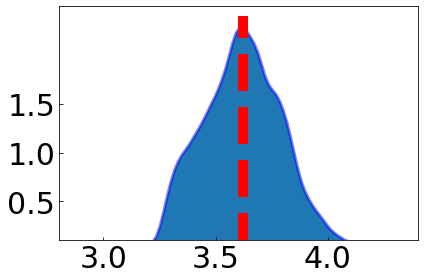

In [98]:
fig, ax = plt.subplots()

ax.tick_params(axis='both', which='major', labelsize=30)


ax.plot(x_grid, pdf_vel_broad, color='blue', alpha=0.5, lw=3)
ax.fill_between(x_grid, pdf_vel_broad)

ax.vlines(np.nanmedian(vel_broad_repr), ymin=0, ymax=2.4, colors='r', linestyles='dashed', linewidth=10)

ax.set_ylim(0.1, 2.5)

ax.set_yticks([0.5, 1, 1.5])
ax.set_xticks([3, 3.5, 4])

plt.xlim(2.8, 4.4)

plt.tight_layout()

fig.savefig(figs_dir + 'kde_distri_vel_broad.pdf')

In [110]:
np.nanmedian(vel_broad_repr)

3.6202687915845755

### $\rm \sigma_{v}$

In [99]:
x_grid = np.linspace(0.05, 1, 100)

In [100]:
kde_sig_narrow = gaussian_kde(sig_narrow_repr[np.isfinite(sig_narrow_repr)])
kde_sig_broad = gaussian_kde(sig_broad_repr[np.isfinite(sig_broad_repr)])


pdf_sig_narrow = kde_sig_narrow.evaluate(x_grid)
pdf_sig_broad = kde_sig_broad.evaluate(x_grid)

# eh = kde_w_weight(x_grid)

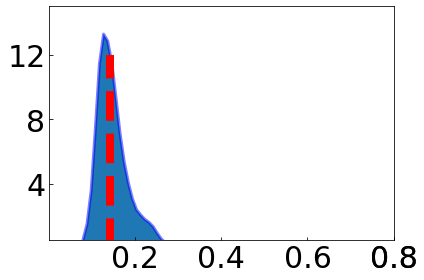

In [109]:
fig, ax = plt.subplots()

ax.tick_params(axis='both', which='major', labelsize=30)


ax.plot(x_grid, pdf_sig_narrow, color='blue', alpha=0.5, lw=3)
ax.fill_between(x_grid, pdf_sig_narrow)

ax.vlines(np.nanmedian(sig_narrow_repr), ymin=0, ymax=12, colors='r', linestyles='dashed', linewidth=8)

ax.set_ylim(0.5, 15)

ax.set_yticks([4, 8, 12])
ax.set_xticks([0.2, 0.4, 0.6, 0.8, 0.8, 1])

plt.xlim(0, 0.8)

plt.tight_layout()

fig.savefig(figs_dir + 'kde_distri_sig_narrow.pdf')

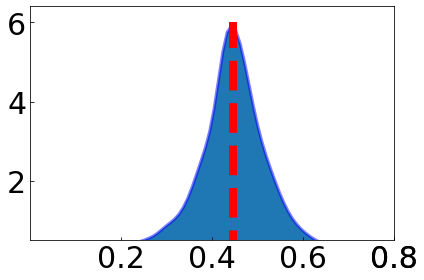

In [108]:
fig, ax = plt.subplots()

ax.tick_params(axis='both', which='major', labelsize=30)


ax.plot(x_grid, pdf_sig_broad, color='blue', alpha=0.5, lw=3)
ax.fill_between(x_grid, pdf_sig_broad)

ax.vlines(np.nanmedian(sig_broad_repr), ymin=0, ymax=6, colors='r', linestyles='dashed', linewidth=8)

ax.set_ylim(0.5, 6.4)

ax.set_yticks([2, 4, 6])
ax.set_xticks([0.2, 0.4, 0.6, 0.8, 0.8, 1])

plt.xlim(0, 0.8)

plt.tight_layout()

fig.savefig(figs_dir + 'kde_distri_sig_broad.pdf')